# Association-Rule Mining with the Apriori Algorithm

### “If a shopper buys coffee, how likely are they to buy sugar?”

Welcome to our AIML course mini-lab on **unsupervised learning**.  
By the end of this notebook you will be able to

- Describe what association rules are and why they matter
- Compute **support**, **confidence**, and **lift**
- Run the Apriori algorithm on a real-world–inspired retail dataset
- Interpret the rules for practical business decisions


In unsupervised learning the algorithm receives **only the inputs** – no labels, no gold-standard answers.  
It tries to **discover structure** all by itself.

| Classical tasks              | Typical goal                                  |
| ---------------------------- | --------------------------------------------- |
| **Clustering**               | Find natural groups (e.g., customer segments) |
| **Dimensionality Reduction** | Build simpler views of data (e.g., PCA)       |
| **Association-Rule Mining**  | Uncover “if-then” buying patterns             |

Today we focus on the third bullet: **Association-Rule Mining**.


### Support

> Fraction of transactions that contain an _itemset_ (one or more items).  
> “How often does _coffee & sugar_ appear together?”

\\[
\text{support}(A,B)= \frac{\#\text{transactions containing }A\text{ and }B}{\#\text{all transactions}}
\\]

---

### Confidence

> Probability of seeing item **B** given that **A** is present.  
> “Among all coffee buyers, what fraction also buy sugar?”

\\[
\text{confidence}(A\Rightarrow B)= \frac{\text{support}(A,B)}{\text{support}(A)}
\\]

---

### Lift

> Strength of the rule compared with random co-occurrence.  
> A lift of **3** means _“coffee buyers are 3× more likely to buy sugar than a random shopper.”_

\\[
\text{lift}(A\Rightarrow B)= \frac{\text{confidence}(A\Rightarrow B)}{\text{support}(B)}
\\]

- Lift ≈ 1 → no association
- Lift < 1 → negative association
- Lift > 1 → positive association


## 🧠 Example : Training Programs in a Company

**Imagine this HR dataset:**

An HR team is analyzing **training program participation** across 100 employees.

- 30 employees attended a **Leadership Training** (Skill A)
- 20 employees attended a **Communication Workshop** (Skill B)
- 15 employees attended **both** Skill A and Skill B

We want to evaluate the association rule:

> **Skill A ⇒ Skill B**
> (If an employee took the leadership training, how likely are they to have also taken the communication workshop?)

---

## 🔢 Step-by-Step Calculations

### 1️⃣ **Support**

📌 **Definition:**
Support = Fraction of records (employees) that contain both **Skill A** and **Skill B**.

🔢 **Calculation:**

- Number of employees with both Skill A and Skill B = 15
- Total number of employees = 100

$$
\text{Support} = \frac{15}{100} = \boxed{0.15}
$$

🗣️ _"15% of all employees took both trainings."_

---

### 2️⃣ **Confidence**

📌 **Definition:**
Confidence = How often does **B** (Communication Workshop) occur **given that A** (Leadership Training) occurs?

🔢 **Calculation:**

- Number of employees with both A and B = 15
- Number of employees with A = 30

$$
\text{Confidence} = \frac{15}{30} = \boxed{0.50}
$$

🗣️ _"Among those who took leadership training, 50% also took the communication workshop."_

---

### 3️⃣ **Lift**

📌 **Definition:**
Lift = How much more likely B is to occur **with** A compared to random chance.

$$
\text{Lift} = \frac{\text{Confidence (A⇒B)}}{\text{Support of B}}
$$

🔢 **Calculation:**

- Confidence = 0.50
- Support of Skill B (Communication) = 20 / 100 = 0.20

$$
\text{Lift} = \frac{0.50}{0.20} = \boxed{2.5}
$$

🗣️ _"An employee who attends leadership training is 2.5× more likely to also attend communication training than a random employee."_

---

## ✅ Summary Table

| Metric         | Value | Meaning                                                     |
| -------------- | ----- | ----------------------------------------------------------- |
| **Support**    | 0.15  | 15% of all employees attended both                          |
| **Confidence** | 0.50  | 50% of leadership trainees also took communication training |
| **Lift**       | 2.5   | Strong positive association; 2.5× more likely than random   |

---

## 💡 HR Insights from This Rule

- There’s a **strong association** between leadership and communication training.
- HR can consider **bundling** these programs together or offering them in sequence.
- Lift > 1 indicates a **positive link** — the trainings reinforce each other.


# Lets Understand with an example


| Emp ID | `Attrition_yes` | `Distance_more` | `Score_low` | `Experience_less` | `Projects_many` |
| -----: | :-------------: | :-------------: | :---------: | :---------------: | :-------------: |
| **E1** |        1        |        0        |      1      |         1         |        0        |
| **E2** |        1        |        1        |      1      |         1         |        1        |
| **E3** |        0        |        1        |      1      |         1         |        0        |
| **E4** |        1        |        0        |      0      |         1         |        0        |
| **E5** |        0        |        0        |      1      |         0         |        0        |


Minimum support is fixed at 2 transactions (2 / 5 = 0.40).


| 1-itemset         | Support (count) | Keep?       |
| ----------------- | --------------- | ----------- |
| {Attrition_yes}   | 3               | ✓           |
| {Distance_more}   | 2               | ✓           |
| {Score_low}       | 4               | ✓           |
| {Experience_less} | 4               | ✓           |
| {Projects_many}   | 1               | ✗ (dropped) |


# 2. Iteration 2 — generate & test 2-itemsets (k = 2)


##2.1 Candidate generation (C₂)
Form every 2-combination from L1
 → 4 C 2 = 6 candidates.


| Candidate 2-itemset              | Support | Keep? |
| -------------------------------- | ------- | ----- |
| {Attrition_yes, Distance_more}   | **1**   | ✗     |
| {Attrition_yes, Score_low}       | 2       | ✓     |
| {Attrition_yes, Experience_less} | 3       | ✓     |
| {Distance_more, Score_low}       | 2       | ✓     |
| {Distance_more, Experience_less} | 2       | ✓     |
| {Score_low, Experience_less}     | 3       | ✓     |


#3. Pruning principle before k = 3


Apriori rule: “All (k – 1)-subsets of a frequent k-itemset must themselves be frequent.”

Why it matters:
When we try to build a 3-item candidate containing {Attrition_yes, Distance_more}, we instantly reject it because that 2-subset isn’t in L2—no need to count its support at all.


# 4. Iteration 3 — 3-itemsets (k = 3)


| Candidate 3-itemset                             | All 2-subsets in L2?   | Support | Prune? |
| ----------------------------------------------- | ---------------------- | ------- | ------ |
| {Attrition_yes, Score_low, Experience_less}     | ✓                      | 2       | keep   |
| {Distance_more, Score_low, Experience_less}     | ✓                      | 2       | keep   |
| {Attrition_yes, Distance_more, Score_low}       | **✗** (subset missing) | —       | prune  |
| {Attrition_yes, Distance_more, Experience_less} | **✗**                  | —       | prune  |


# 5. Iteration 4 — attempt 4-itemsets (k = 4)


{Attrition_yes, Distance_more, Score_low, Experience_less}
But it contains the pruned subset {Attrition_yes, Distance_more, Score_low} → rejected during pruning.
No other 4-item candidates are possible, so Apriori stops here.


# 🧾 Frequent Itemsets from Final Iteration:

Let's take Itemset 1: {Attrition_Yes, Score_Low, Experience_Less}
We can form multiple rules by choosing:

Antecedent (LHS)

Consequent (RHS)


| Rule                                        | Support   | Confidence      | Formula                                        |
| ------------------------------------------- | --------- | --------------- | ---------------------------------------------- |
| Attrition_Yes & Score_Low ⇒ Experience_Less | 2/5 = 0.4 | 2/3 ≈ **0.666** | confidence = support({A,B,C}) / support({A,B}) |
| Attrition_Yes & Experience_Less ⇒ Score_Low | 2/5 = 0.4 | 2/2 = **1.0**   | 2 / support({A,C})                             |
| Score_Low & Experience_Less ⇒ Attrition_Yes | 2/5 = 0.4 | 2/3 ≈ **0.666** | 2 / support({B,C})                             |


| Rule                                        | Confidence |
| ------------------------------------------- | ---------- |
| Attrition_Yes & Score_Low ⇒ Experience_Less | 0.666      |
| Attrition_Yes & Experience_Less ⇒ Score_Low | 1.0        |
| Score_Low & Experience_Less ⇒ Attrition_Yes | 0.666      |
| Distance_More & Score_Low ⇒ Experience_Less | 0.666      |
| Distance_More & Experience_Less ⇒ Score_Low | 1.0        |
| Score_Low & Experience_Less ⇒ Distance_More | 0.666      |


# Association Rule Mining for Text Data


In [ ]:
import pandas as pd
df = pd.read_csv("groceries-groceries.csv")
df.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
!pip -q install mlxtend --upgrade


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [ ]:
# 2.1  Read the file exactly as you showed (33 columns: Item(s) + 32 items)
df_raw = pd.read_csv("groceries-groceries.csv")

# 2.2  Quick sanity check
df_raw.head()


,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
"""
Builds transactions → a Python list of 9 835 lists.
"""

transactions = []

for idx, row in df_raw.iterrows():
    # Row[1:] skips the "Item(s)" count column
    basket = [item for item in row[1:] if pd.notna(item)]
    transactions.append(basket)

print("Example basket 0:", transactions[0])
print("Total baskets  :", len(transactions))


Example basket 0: ['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']
Total baskets  : 9835


In [ ]:
print(f"{len(transactions):,} baskets loaded "
      f"with {len(set(sum(transactions, []))):,} unique products")

9,835 baskets loaded with 169 unique products


# 2 EDA: how big are baskets, what sells the most?


In [ ]:
basket_sizes = [len(t) for t in transactions]
pd.Series(basket_sizes).describe()


,0
count,9835.000000
mean,4.409456
std,3.589385
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,32.000000


In [ ]:
#median basket size - 3

In [ ]:
# top 15 individual items by frequency
"""
Each column is an item name; True/False indicates if that item appeared in that transaction.

"""

te = TransactionEncoder()
item_matrix = te.fit_transform(transactions)
df_items = pd.DataFrame(item_matrix, columns=te.columns_)
df_items.head()


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df_items.sum()

,0
Instant food products,79
UHT-milk,329
abrasive cleaner,35
artif. sweetener,32
baby cosmetics,6
...,...
white bread,414
white wine,187
whole milk,2513
yogurt,1372


In [ ]:
top_items = df_items.sum().sort_values(ascending=False).head(15) / len(df_items)
print(top_items.round(3))

whole milk          0.256
other vegetables    0.193
rolls/buns          0.184
soda                0.174
yogurt              0.140
bottled water       0.111
root vegetables     0.109
tropical fruit      0.105
shopping bags       0.099
sausage             0.094
pastry              0.089
citrus fruit        0.083
bottled beer        0.081
newspapers          0.080
canned beer         0.078
dtype: float64


**Why the thresholds below make sense**

“Whole milk” alone appears in ≈ 25 % of every basket – that’s huge.

Many interesting pairs appear in the 2–5 % range.

Business analysts usually ignore rules that show up in under 1 % of all sales because they are too sparse to act on.


# 3 Boolean matrix for Apriori


In [ ]:
df_basket = pd.DataFrame(item_matrix, columns=te.columns_)
df_basket.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# 4 Apriori with industry-style thresholds


In [ ]:
"""
min_support = 0.02 → itemset must appear in at least 2 % of baskets (≈ 197 transactions).

We’ll let Apriori build up to length = 3 to keep compute quick but still capture triples.
"""
freq_sets = apriori(
    df_basket,
    min_support=0.02,
    use_colnames=True,
    max_len=3,
    verbose=1
)
freq_sets["length"] = freq_sets.itemsets.str.len()
print(f"{len(freq_sets)} frequent itemsets ≥ 2 % support")
freq_sets.head()



Processing 630 combinations | Sampling itemset size 3
122 frequent itemsets ≥ 2 % support


,support,itemsets,length
0,0.033452,(UHT-milk),1
1,0.052466,(beef),1
2,0.033249,(berries),1
3,0.026029,(beverages),1
4,0.080529,(bottled beer),1


# 5 Association-rule mining


#5 .1 High-confidence rules (≥ 0.40)


In [ ]:
rules_conf = association_rules(
    freq_sets,
    metric="confidence",
    min_threshold=0.40
).sort_values("confidence", ascending=False)
rules_conf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
14,"(other vegetables, yogurt)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,1.0,0.011174,1.528340,0.524577,0.080485,0.345695,0.300014
1,(butter),(whole milk),0.055414,0.255516,0.027555,0.497248,1.946053,1.0,0.013395,1.480817,0.514659,0.097237,0.324697,0.302543
2,(curd),(whole milk),0.053279,0.255516,0.026131,0.490458,1.919481,1.0,0.012517,1.461085,0.505984,0.092446,0.315577,0.296363
12,"(root vegetables, other vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,1.0,0.011076,1.457687,0.501524,0.082879,0.313982,0.289999
13,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,1.0,0.013719,1.533320,0.622230,0.105751,0.347821,0.296912
3,(domestic eggs),(whole milk),0.063447,0.255516,0.029995,0.472756,1.850203,1.0,0.013783,1.412030,0.490649,0.103800,0.291800,0.295073
10,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,1.0,0.013916,1.352735,0.465077,0.109273,0.260757,0.287895
8,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,1.0,0.021056,1.350401,0.483202,0.154961,0.259479,0.320049
6,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,1.0,0.026291,1.426693,0.622764,0.185731,0.299078,0.339789
4,(frozen vegetables),(whole milk),0.048094,0.255516,0.020437,0.424947,1.663094,1.0,0.008149,1.294636,0.418855,0.072172,0.227582,0.252466


#5 .2 High-lift rules (≥ 1.50)


In [ ]:
rules_lift = association_rules(
    freq_sets,
    metric="lift",
    min_threshold=1.50
).sort_values("lift", ascending=False)
rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
67,(root vegetables),"(other vegetables, whole milk)",0.108998,0.074835,0.023183,0.212687,2.842082,1.0,0.015026,1.175091,0.727435,0.144304,0.149002,0.261235
66,"(other vegetables, whole milk)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,1.0,0.015026,1.290900,0.700572,0.144304,0.225347,0.261235
40,(pip fruit),(tropical fruit),0.075648,0.104931,0.020437,0.270161,2.574648,1.0,0.012499,1.226392,0.661650,0.127619,0.184600,0.232464
41,(tropical fruit),(pip fruit),0.104931,0.075648,0.020437,0.194767,2.574648,1.0,0.012499,1.147931,0.683297,0.127619,0.128868,0.232464
68,(other vegetables),"(root vegetables, whole milk)",0.193493,0.048907,0.023183,0.119811,2.449770,1.0,0.013719,1.080555,0.733779,0.105751,0.074550,0.296912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,(pork),(whole milk),0.057651,0.255516,0.022166,0.384480,1.504719,1.0,0.007435,1.209520,0.355945,0.076171,0.173226,0.235614
23,(fruit/vegetable juice),(other vegetables),0.072293,0.193493,0.021047,0.291139,1.504653,1.0,0.007059,1.137751,0.361531,0.085999,0.121073,0.199957
22,(other vegetables),(fruit/vegetable juice),0.193493,0.072293,0.021047,0.108776,1.504653,1.0,0.007059,1.040936,0.415861,0.085999,0.039326,0.199957
2,(soda),(bottled water),0.174377,0.110524,0.028978,0.166181,1.503577,1.0,0.009705,1.066750,0.405656,0.113230,0.062573,0.214185


# 6 Pick the Top-5 business-ready rules


In [ ]:
#We’ll apply three practical filters simultaneously:

#support ≥ 0.03 (≈ 3 % of all trips) – enough transactions to matter.

#confidence ≥ 0.45 – nearly “every-other-time reliability”.

#lift ≥ 1.6 – at least 60 % better odds than random.

candidate_rules = association_rules(
    freq_sets,
    metric="confidence",
    min_threshold=0.40
)
important = candidate_rules[
    (candidate_rules["support"] >= 0.03) &
    (candidate_rules["lift"]    >= 1.60)
].sort_values(["confidence", "lift"], ascending=False)

top5 = important.head(5).reset_index(drop=True)
top5[["antecedents", "consequents",
      "support", "confidence", "lift"]]


,antecedents,consequents,support,confidence,lift
0,(whipped/sour cream),(whole milk),0.032232,0.449645,1.759754
1,(root vegetables),(whole milk),0.048907,0.448694,1.756031
2,(root vegetables),(other vegetables),0.047382,0.434701,2.246605


| Metric         | Meaning                                                                          | Business Interpretation                                                                                          |
| -------------- | -------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------- |
| **Support**    | % of all baskets that contain both the antecedent and consequent                 | How **common** the rule is in real life (e.g., 3.2% of shoppers buy both sour cream & milk)                      |
| **Confidence** | % of antecedent baskets that also have the consequent                            | How **reliable** the rule is (e.g., among sour cream buyers, 45% also buy whole milk)                            |
| **Lift**       | How much more likely the consequent is, given the antecedent, compared to random | Measures **strength vs. chance**. Lift > 1 = positive association (e.g., Lift = 1.75 means it's 75% more likely) |


# 🧠 Interpretation & Business Actions


Great — let’s break this down step by step:

---

## 🔍 **Refresher: What do Support, Confidence, and Lift mean in Association Rules?**

| Metric         | Meaning                                                                          | Business Interpretation                                                                                          |
| -------------- | -------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------- |
| **Support**    | % of all baskets that contain both the antecedent and consequent                 | How **common** the rule is in real life (e.g., 3.2% of shoppers buy both sour cream & milk)                      |
| **Confidence** | % of antecedent baskets that also have the consequent                            | How **reliable** the rule is (e.g., among sour cream buyers, 45% also buy whole milk)                            |
| **Lift**       | How much more likely the consequent is, given the antecedent, compared to random | Measures **strength vs. chance**. Lift > 1 = positive association (e.g., Lift = 1.75 means it's 75% more likely) |

---

## 📊 Your Top 3 Rules

| Rule # | Antecedent → Consequent                    | Support | Confidence | Lift |
| ------ | ------------------------------------------ | ------- | ---------- | ---- |
| **1**  | `(whipped/sour cream)` → `(whole milk)`    | 3.2%    | 44.96%     | 1.76 |
| **2**  | `(root vegetables)` → `(whole milk)`       | 4.9%    | 44.87%     | 1.76 |
| **3**  | `(root vegetables)` → `(other vegetables)` | 4.7%    | 43.47%     | 2.25 |

---

## 🧠 Interpretation & Business Actions

---

### 🔸 **Rule 1: whipped/sour cream ⇒ whole milk**

- **Support**: 3.2% of all baskets have both.
- **Confidence**: 45% of cream buyers also buy milk.
- **Lift**: These two are bought **1.76× more often together than by random chance**.

🔧 **Business Interpretation**:
This suggests a **“meal-prep” behavior** — shoppers buying cream are likely preparing a recipe and adding milk. Both are perishable dairy items.

📈 **Action Plan**:

- **Bundle Offer**: “Buy sour cream, get ₹10 off whole milk.”
- **Shelf Placement**: Place sour cream near milk (or in the same aisle, if separate).
- **Coupon Targeting**: If someone buys cream, send digital offer for milk next trip.

---

### 🔸 **Rule 2: root vegetables ⇒ whole milk**

- **Support**: Found in 4.9% of all baskets.
- **Confidence**: Almost 45% of root veg buyers also grab milk.
- **Lift**: 1.76 – stronger than random by 76%.

🔧 **Business Interpretation**:
Indicates **core household shopping trips** — root veg (e.g., potatoes, carrots) and milk are part of basic grocery refills.

📈 **Action Plan**:

- **Highlight "family basket essentials"** in marketing.
- Cross-promote: “Family dinner starter pack” featuring milk, potatoes, and onions.
- Consider **product placement near entrance** to grab both quickly.

---

### 🔸 **Rule 3: root vegetables ⇒ other vegetables**

- **Support**: Appears in 4.7% of all baskets.
- **Confidence**: 43% of root veg buyers also buy “other vegetables.”
- **Lift**: **2.25** — very high. These are bought together **more than 2× random chance**.

🔧 **Business Interpretation**:
This reflects **produce cross-selling** behavior: when a shopper is in the vegetable section, they pick both kinds.

📈 **Action Plan**:

- **Bundle signage**: “Make your own sabzi kit” with carrots, beans, tomatoes.
- Consider **combo pricing** on 3+ vegetable types.
- **Shelf adjacency**: Make sure root and non-root veg are adjacent to encourage discovery.

---

## 🧠 Summary Strategy Based on These Rules

| Goal                            | Tactic                                 | Metric Backing                       |
| ------------------------------- | -------------------------------------- | ------------------------------------ |
| Boost dairy basket size         | Cross-promote cream & milk             | Rule 1: Confidence 45%, Lift 1.76    |
| Increase trip value for produce | Bundle root and other vegetables       | Rule 3: Lift 2.25                    |
| Reinforce daily essentials      | Position milk near staples             | Rules 1 & 2: Shared behavior pattern |
| Retarget frequent buyers        | Offer digital coupons for linked items | Based on confidence > 40%            |

---

## 🏁 Final Notes

- All 3 rules show **confidences above 43%** — that’s _very reliable_.
- All have **Lift > 1.75**, which is _significantly better than random_.
- **Support > 3%** means these rules apply to _hundreds of transactions_ – worth acting on.


# Image Data Analysis


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('image_transactions.csv', header=None)

df.head()

,0,1,2,3,4
0,0,1,2,3,4
1,data/smartphone.jpeg,data/laptop_case.jpeg,data/headphones.jpeg,NaN,NaN
2,data/stylus.jpeg,data/headphones.jpeg,data/tablet.jpeg,NaN,NaN
3,data/headphones.jpeg,data/phone_case.jpeg,data/tablet_case.jpeg,data/screen_protector.jpeg,data/charger.jpeg
4,data/phone_case.jpeg,data/smartwatch.jpeg,data/screen_protector.jpeg,data/mouse.jpeg,NaN


In [ ]:
df

,0,1,2,3,4
0,0,1,2,3,4
1,data/smartphone.jpeg,data/laptop_case.jpeg,data/headphones.jpeg,NaN,NaN
2,data/stylus.jpeg,data/headphones.jpeg,data/tablet.jpeg,NaN,NaN
3,data/headphones.jpeg,data/phone_case.jpeg,data/tablet_case.jpeg,data/screen_protector.jpeg,data/charger.jpeg
4,data/phone_case.jpeg,data/smartwatch.jpeg,data/screen_protector.jpeg,data/mouse.jpeg,NaN
5,data/smartwatch.jpeg,data/keyboard.jpeg,data/laptop.jpeg,data/phone_case.jpeg,data/smartphone.jpeg
6,data/smartwatch.jpeg,data/mouse.jpeg,data/keyboard.jpeg,data/tablet_case.jpeg,data/laptop.jpeg
7,data/smartwatch.jpeg,data/screen_protector.jpeg,NaN,NaN,NaN
8,data/phone_case.jpeg,data/stylus.jpeg,NaN,NaN,NaN
9,data/stylus.jpeg,data/laptop_case.jpeg,data/screen_protector.jpeg,NaN,NaN


In [ ]:

# Clean path and extension (e.g., 'data/smartphone.jpeg' → 'smartphone')
df_cleaned = df.applymap(lambda x: x.split('/')[-1].replace('.jpeg', '') if isinstance(x, str) else x)
df_cleaned.head()

<ipython-input-64-43a06fcc4548>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df.applymap(lambda x: x.split('/')[-1].replace('.jpeg', '') if isinstance(x, str) else x)


,0,1,2,3,4
0,0,1,2,3,4
1,smartphone,laptop_case,headphones,NaN,NaN
2,stylus,headphones,tablet,NaN,NaN
3,headphones,phone_case,tablet_case,screen_protector,charger
4,phone_case,smartwatch,screen_protector,mouse,NaN


In [ ]:
df_cleaned.drop(0,inplace=True)
df_cleaned.head()

,0,1,2,3,4
1,smartphone,laptop_case,headphones,NaN,NaN
2,stylus,headphones,tablet,NaN,NaN
3,headphones,phone_case,tablet_case,screen_protector,charger
4,phone_case,smartwatch,screen_protector,mouse,NaN
5,smartwatch,keyboard,laptop,phone_case,smartphone


# 🔹 Step 2: Visualize Some Images using Subplots


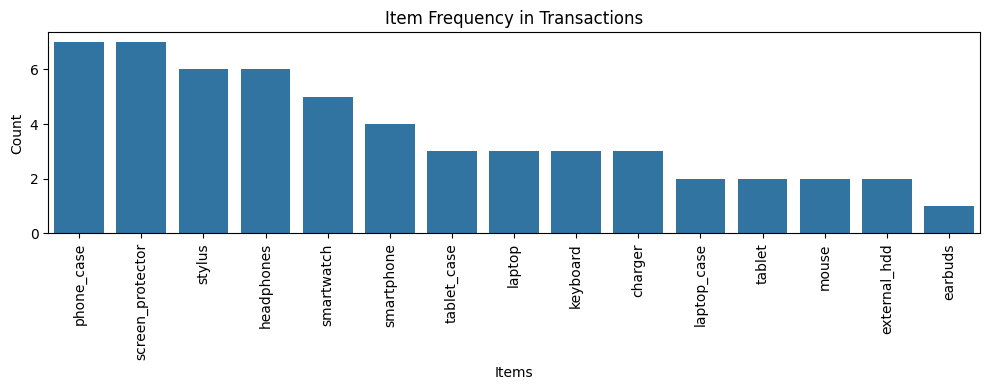

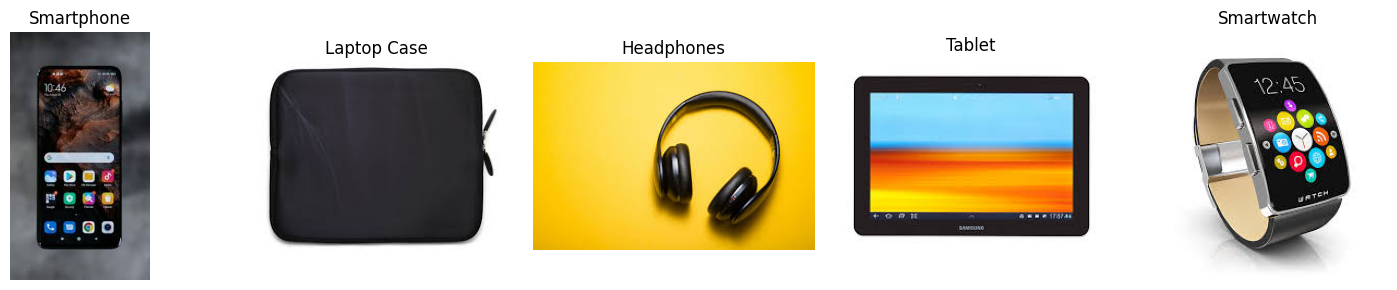

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

df =df_cleaned

# Flatten transactions to count item frequency
all_items = df.values.flatten()
all_items = [item for item in all_items if item is not None]

# Frequency plot
plt.figure(figsize=(10, 4))
sns.countplot(x=all_items, order=pd.Series(all_items).value_counts().index)
plt.title("Item Frequency in Transactions")
plt.xticks(rotation=90)
plt.xlabel("Items")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Show sample product images (optional)
sample_items = ["smartphone", "laptop_case", "headphones", "tablet", "smartwatch"]
fig, axs = plt.subplots(1, len(sample_items), figsize=(15, 3))

for i, item in enumerate(sample_items):
    img_path = f"data/{item}.jpeg"
    if os.path.exists(img_path):
        img = Image.open(img_path)
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(item.replace('_', ' ').title())
    else:
        axs[i].axis('off')
        axs[i].set_title(f"Missing: {item}")

plt.tight_layout()
plt.show()



In [ ]:
df.head()

,0,1,2,3,4
1,smartphone,laptop_case,headphones,NaN,NaN
2,stylus,headphones,tablet,NaN,NaN
3,headphones,phone_case,tablet_case,screen_protector,charger
4,phone_case,smartwatch,screen_protector,mouse,NaN
5,smartwatch,keyboard,laptop,phone_case,smartphone


In [ ]:
df

,0,1,2,3,4
1,smartphone,laptop_case,headphones,NaN,NaN
2,stylus,headphones,tablet,NaN,NaN
3,headphones,phone_case,tablet_case,screen_protector,charger
4,phone_case,smartwatch,screen_protector,mouse,NaN
5,smartwatch,keyboard,laptop,phone_case,smartphone
6,smartwatch,mouse,keyboard,tablet_case,laptop
7,smartwatch,screen_protector,NaN,NaN,NaN
8,phone_case,stylus,NaN,NaN,NaN
9,stylus,laptop_case,screen_protector,NaN,NaN
10,headphones,keyboard,laptop,NaN,NaN


# Step 1: Convert the DataFrame into the Format Required by Apriori


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Step 1: Original data (assuming 'clead' is the DataFrame)
clead = df

# Step 2: Convert to list of transactions (drop NaNs)
transactions = clead.apply(lambda row: row.dropna().tolist(), axis=1).tolist()

# Step 3: Use TransactionEncoder to one-hot encode
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Step 4: Create DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()


,charger,earbuds,external_hdd,headphones,keyboard,laptop,laptop_case,mouse,phone_case,screen_protector,smartphone,smartwatch,stylus,tablet,tablet_case
0,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False
2,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True
3,False,False,False,False,False,False,False,True,True,True,False,True,False,False,False
4,False,False,False,False,True,True,False,False,True,False,True,True,False,False,False


Explanation:
Each row represents a transaction

Each column is a unique item

True indicates the item is present in that transaction, False means it's not

✅ This is the required input format for running Apriori algorithm in mlxtend.


# 🚀 Step 2: Run Apriori to Find Frequent Itemsets


In [ ]:
from mlxtend.frequent_patterns import apriori
"""
df: One-hot encoded DataFrame (from Step 1)

min_support=0.5: Itemsets must appear in at least 50% of transactions

use_colnames=True: Returns item names instead of index positions
"""

# Step 2: Apply Apriori on the one-hot encoded df
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.200000,(charger)
1,0.400000,(headphones)
2,0.200000,(keyboard)
3,0.200000,(laptop)
4,0.466667,(phone_case)
5,0.466667,(screen_protector)
6,0.266667,(smartphone)
7,0.333333,(smartwatch)
8,0.400000,(stylus)
9,0.200000,(tablet_case)


# ✅ Step 3: Generate Association Rules + Visualize


In [ ]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display top rules sorted by confidence
rules.sort_values(by="confidence", ascending=False, inplace=True)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift
0,(charger),(screen_protector),0.2,1.0,2.142857
2,(keyboard),(laptop),0.2,1.0,5.000000
3,(laptop),(keyboard),0.2,1.0,5.000000
4,(smartwatch),(phone_case),0.2,0.6,1.285714
1,(headphones),(screen_protector),0.2,0.5,1.071429
5,(stylus),(phone_case),0.2,0.5,1.071429
6,(stylus),(screen_protector),0.2,0.5,1.071429


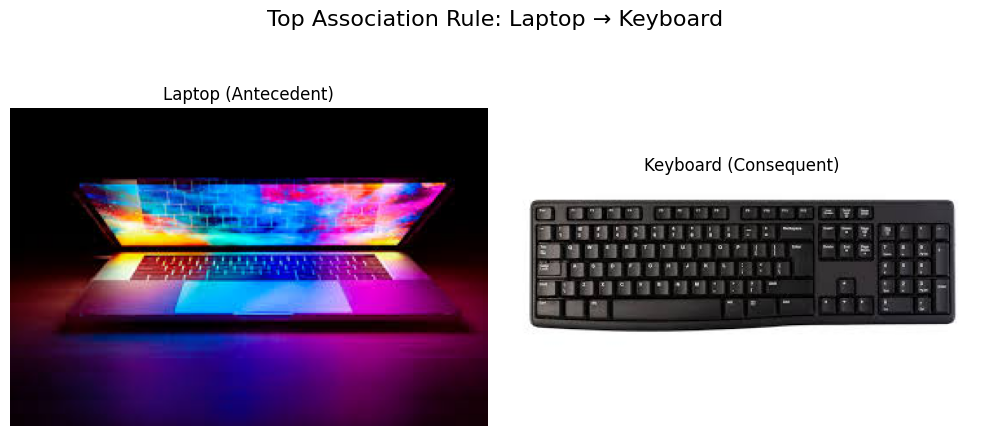

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Load images for antecedent and consequent
img1 = Image.open("data/laptop.jpeg")       # Replace with your actual image path
img2 = Image.open("data/keyboard.jpeg")     # Replace with your actual image path

# Create subplot to display side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display antecedent
axes[0].imshow(img1)
axes[0].set_title("Laptop (Antecedent)")
axes[0].axis("off")

# Display consequent
axes[1].imshow(img2)
axes[1].set_title("Keyboard (Consequent)")
axes[1].axis("off")

# Add a common title
plt.suptitle("Top Association Rule: Laptop → Keyboard", fontsize=16)
plt.tight_layout()
plt.show()


# OPtional


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


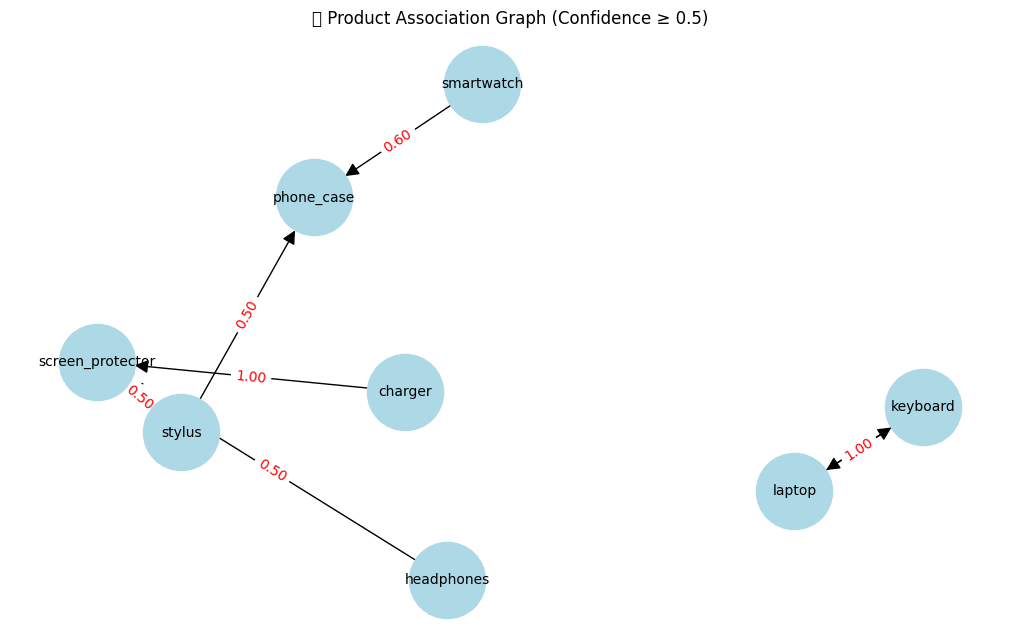

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize directed graph
G = nx.DiGraph()

# Add edges with confidence as weight
for _, row in rules.iterrows():
    for ante in row['antecedents']:
        for cons in row['consequents']:
            G.add_edge(ante, cons, weight=row['confidence'])

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=1)
edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d:.2f}" for (u, v), d in edge_labels.items()}, font_color='red')

plt.title("📦 Product Association Graph (Confidence ≥ 0.5)")
plt.show()
